<a href="https://colab.research.google.com/github/Muhammad-Fauzan-Alfariz/Apparel-Classification/blob/main/Apparel%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD

from keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from random import randint
import cv2 as cv
import plotly.graph_objs as go
import numpy as np
import zipfile
import os
import re, shutil 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive"

'Apparel_Classification (1).ipynb'   apparel_image_datasets.zip
 apparel-image-dataset


In [4]:
# Ekstraksi file zip
local_zip = '/content/drive/MyDrive/apparel_image_datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/apparel-image-dataset')
zip_ref.close()

In [5]:
data_dir = '/content/drive/MyDrive/apparel-image-dataset'
print(os.listdir(data_dir))

['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_pants', 'brown_shoes', 'brown_shorts', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'red_dress', 'red_pants', 'red_shoes', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts']


In [6]:
# Buat direktori baru
new_dir = '/content/drive/MyDrive/apparel-images-dataset-category_only'
os.mkdir(new_dir)  # Buat direktori kategori gambar

In [7]:
# Kelompokkan gambar pada direktori kategori
for folder_dir in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_dir)
        label_dir = re.findall(r'\w+\_\w+', folder_path)
        label_dir = label_dir[0].split('_')[1]
        label_dir = os.path.join(new_dir, label_dir)
       
        if not os.path.isdir(label_dir):
          os.mkdir(label_dir)
            

        for image in os.listdir(folder_path):
            path_to_img = os.path.join(folder_path, image)
            label = re.findall(r'\w+\_\w+', path_to_img)
            label = label[0].split('_')[1]
            dest_dir = os.path.join(new_dir, label)
            shutil.move(path_to_img,dest_dir)

In [8]:
image_count = []

def image(new_dir,total_image):
 # perulangan untuk categori dalam os.listdir(new_dir)
 for category in os.listdir(new_dir):
   # gabungkan data new dir(origin) dengan os.listdir(new_dir)
   img_dir = os.path.join(new_dir, category)
   # banyak data file gambar tiap list di img_dir
   img = len(os.listdir(img_dir))
   # Tampung gambar
   image_count.append(img)
   total_image += img
   print(f"{category} : {img}")
 print("Total Image : ", total_image)

image(new_dir,total_image = 0)

dress : 2570
pants : 2789
shirt : 1686
shoes : 3418
shorts : 922
Total Image :  11385


In [9]:
print(os.listdir(new_dir))

['dress', 'pants', 'shirt', 'shoes', 'shorts']


In [10]:
# create trace1 
folder_count = os.listdir(new_dir)
image_apparel = np.arange(len(folder_count))

trace1 = go.Bar(
                x = folder_count,
                y = image_count,
                marker = dict(color = 'rgba(113, 246, 18, 0.4)',
                             line   = dict(color='rgb(79,139,135)',
                             width = 1)),
                text = folder_count)


data = [trace1]
layout = go.Layout(barmode = "group",
                   title = 'Apparel Category',
                   width=600,
                   height=500,
                   paper_bgcolor="lightsteelblue")

fig = go.Figure(data = data, 
                layout = layout)
fig.show()

In [11]:
# Pisahkan atribut dan label
def get_images(directory):
    Images  = []  # List gambar
    Labels  = []  # List kategori gambar
    label   = 0

    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'shirt': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'shoes':
            label = 4
        elif labels == 'dress':
            label = 0
        elif labels == 'pants':
            label = 1
        elif labels == 'shorts':
            label = 3
        
        
        for image_file in os.listdir(directory + labels):
            image_folder = os.path.join(directory + labels + r'/' + image_file)
            image = cv.imread(image_folder)
            image = cv.resize(image, (75,75))
            Images.append(image)
            Labels.append(labels)

    return shuffle(Images, Labels, random_state = 817328462)

# def get_classlabel(class_code):
#   labels = {2:'shirt', 4:'shoes',0:'dress',1:'pants',3:'shorts'}
#   return labels[class_code]         
        

In [12]:
Images, Labels = get_images('/content/drive/MyDrive/apparel-images-dataset-category_only/')

Images = np.array(Images)
Labels = np.array(Labels)

In [13]:
# before labelBinarizer
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (11385, 75, 75, 3)
Shape of Labels: (11385,)


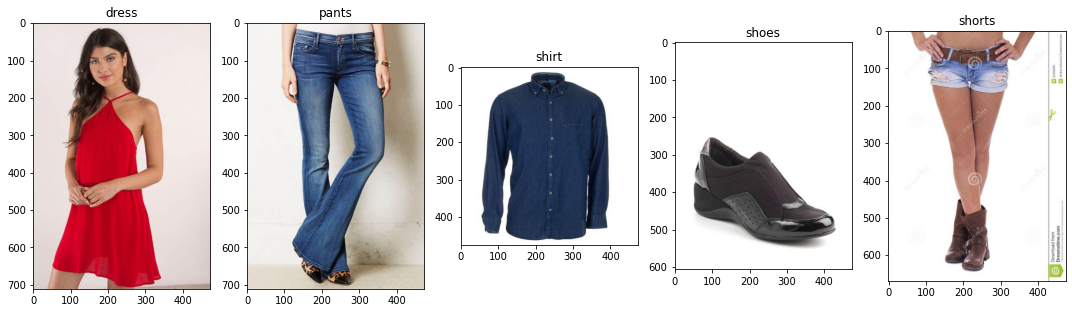

In [14]:
# Tampilkan sampel gambar per folder
fig = plt.figure(figsize = (15,5))
ax = []
i = 1

for image in os.listdir(new_dir):
    ax.append(fig.add_subplot(1,5,i))
    i += 1
    ax[-1].set_title(str(image))
    image_folder = os.path.join(new_dir, image)
    rnd_number = randint(0, len(os.listdir(image_folder)))
    image_file = os.listdir(image_folder)[rnd_number]
    image_file = os.path.join(image_folder, image_file)
    image_show = mpimg.imread(image_file)
    plt.imshow(image_show)

fig.tight_layout()
plt.show()

In [15]:
lb_category = LabelBinarizer()
Labels = lb_category.fit_transform(Labels)

In [16]:
# after labelBinarizer
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (11385, 75, 75, 3)
Shape of Labels: (11385, 5)


In [17]:
label_classes = lb_category.classes_.astype('object')
label_classes

array(['dress', 'pants', 'shirt', 'shoes', 'shorts'], dtype=object)

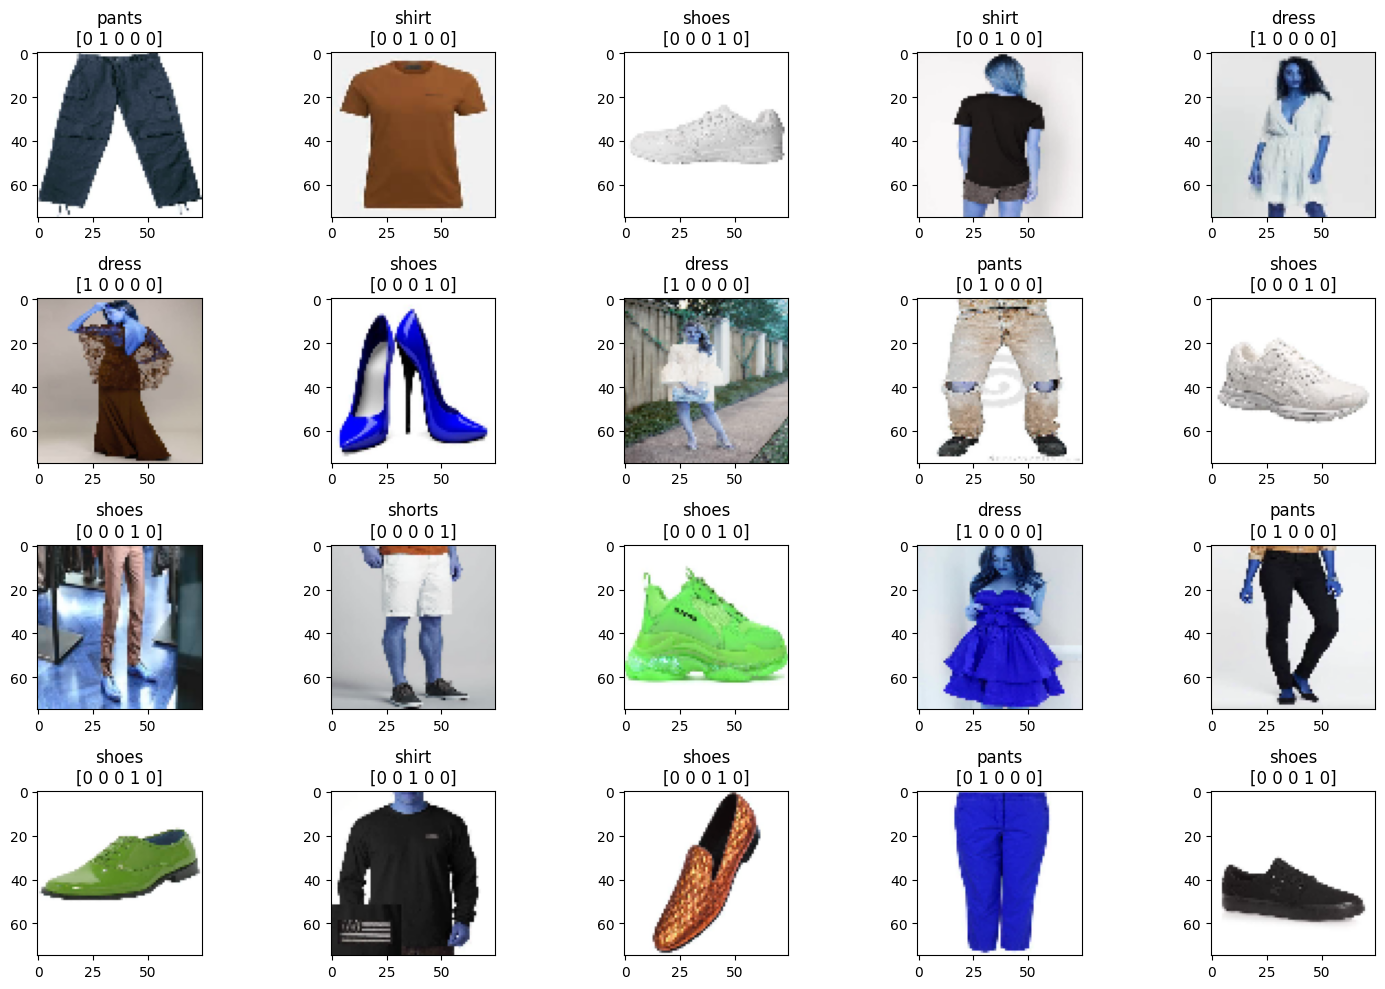

In [18]:
fig = plt.figure(figsize=(15,10),dpi = 100)
ax = []
for i in range(20):
    rnd_number = randint(0,len(Images))
    ax.append(fig.add_subplot(4, 5, i+1))
    bin_class = Labels[rnd_number]
    lab_class = label_classes[np.argmax(Labels[rnd_number])]
    title = f'{lab_class}\n{bin_class}'
    ax[-1].set_title(title)
    plt.imshow(Images[rnd_number])

fig.tight_layout()    
plt.show()

In [19]:
# Bagi train set dan test set
from sklearn.model_selection import train_test_split

X_img, X_imgtest, Y_label, Y_labeltest = train_test_split(Images, Labels, test_size = 0.2)

In [20]:
print(X_img.shape, Y_label.shape)
print(X_imgtest.shape, Y_labeltest.shape)

(9108, 75, 75, 3) (9108, 5)
(2277, 75, 75, 3) (2277, 5)


In [21]:
img_datagen = ImageDataGenerator(rescale =1./255, 
                                 horizontal_flip = True, 
                                 height_shift_range = 0.2, 
                                 width_shift_range = 0.2,
                                 zoom_range = 0.2, 
                                 shear_range = 0.2,
                                 rotation_range = 45,
                                 fill_mode = 'nearest', 
                                 validation_split = 0.2)

train_generator   = img_datagen.flow(X_img, 
                                     Y_label,
                                     shuffle=True,)

validation_generator = img_datagen.flow(X_img, 
                                        Y_label, 
                                        subset='validation',
                                        shuffle=False)

In [22]:
from tensorflow.keras import models, layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau,LearningRateScheduler

def ConvBlock(model, filters, layers,name):
    for i in range(layers):
        model.add(Conv2D(filters, (5,5), padding = 'same',activation='relu',name=name))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

def create_model():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(75, 75, 3)))
    ConvBlock(model, 64,  1,'block_1')
    ConvBlock(model, 128, 1,'block_2')
    ConvBlock(model, 256, 1,'block_3')
    ConvBlock(model, 512, 1,'block_4')
    ConvBlock(model, 512, 1,'block_5')
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5,activation='softmax'))
    return model 

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 75, 75, 3)         0         
_________________________________________________________________
block_1 (Conv2D)             (None, 75, 75, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
block_2 (Conv2D)             (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
block_3 (Conv2D)             (None, 18, 18, 256)       819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 256)         0

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi model > 92% !!")
      self.model.stop_training = True

callback90 = myCallback()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', 
                                                factor = 0.5,
                                                patience = 3,
                                                min_lr = 1.0e-05, 
                                                verbose = 1)

In [24]:
optimizers = Adam(lr = 0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers,
    metrics=['accuracy'])
    
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 35,
                    verbose = 1,
                    batch_size = 32,
                    callbacks=[#callback90,
                               reduce_lr])

Epoch 1/35
285/285 [==============================] - 24s 74ms/step - loss: 1.4512 - accuracy: 0.3207 - val_loss: 1.0898 - val_accuracy: 0.5656
Epoch 2/35
285/285 [==============================] - 20s 71ms/step - loss: 1.0590 - accuracy: 0.5613 - val_loss: 0.9001 - val_accuracy: 0.6480
Epoch 3/35
285/285 [==============================] - 20s 71ms/step - loss: 0.8126 - accuracy: 0.7055 - val_loss: 0.6798 - val_accuracy: 0.7463
Epoch 4/35
285/285 [==============================] - 21s 72ms/step - loss: 0.6625 - accuracy: 0.7642 - val_loss: 0.5234 - val_accuracy: 0.8138
Epoch 5/35
285/285 [==============================] - 20s 71ms/step - loss: 0.5607 - accuracy: 0.7981 - val_loss: 0.4614 - val_accuracy: 0.8342
Epoch 6/35
285/285 [==============================] - 20s 71ms/step - loss: 0.4774 - accuracy: 0.8318 - val_loss: 0.4202 - val_accuracy: 0.8545
Epoch 7/35
285/285 [==============================] - 20s 71ms/step - loss: 0.4462 - accuracy: 0.8439 - val_loss: 0.3818 - val_accuracy:

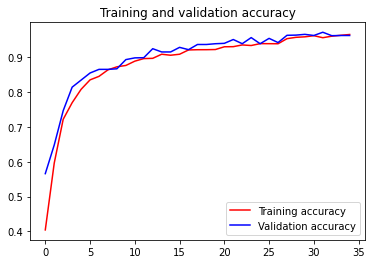

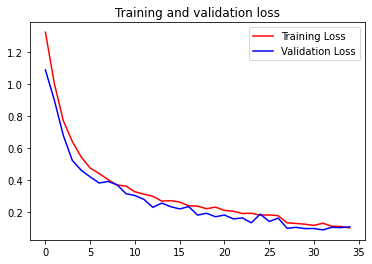

In [25]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Evaluasi model pada test set
score = model.evaluate(X_imgtest, Y_labeltest)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 1s 16ms/step - loss: 30.7635 - accuracy: 0.9289
Test Loss: 30.763473510742188
Test accuracy: 0.9288537502288818


shoes


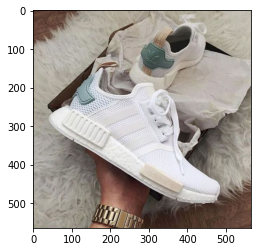

In [27]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show = True):
    image = mpimg.imread(img_path)
    img   = cv.resize(image, (75,75))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    if show:
      print(label_classes[np.argmax(score)])
      plt.imshow(image)
       

if __name__ == "__main__":
    img_url = "https://i.pinimg.com/564x/e8/ef/44/e8ef44546e8de77417421a760b7c5532.jpg"

    # image path
    img_path = tf.keras.utils.get_file('appa', origin=img_url)

    # load a single image
    new_image = load_image(img_path)